In [4]:
%config IPCompleter.use_jedi = False

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)
per_clf =Perceptron()
per_clf.fit(X,y)
y_pred = per_clf.predict([[2,0.5]])
 

Perceptron()

### MLPs with Keras

In [13]:
import tensorflow as tf
from tensorflow import keras

'2.4.1'

In [17]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [18]:
## images represented as 28x28 array
## pixels are integers 0-255
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [25]:
#scale data and create validation set
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

'Sneaker'

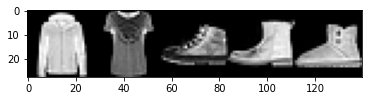

In [34]:
#sample images
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.imshow(np.concatenate(X_train[0:5], axis = 1), cmap = 'gray')

In [36]:
model = keras.models.Sequential([
    (keras.layers.Flatten(input_shape = [28,28])),
    (keras.layers.Dense(300, activation = "relu")),
    (keras.layers.Dense(100, activation = "relu")),
    (keras.layers.Dense(10, activation = "softmax"))
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [39]:
history = model.fit(X_train,y_train, epochs = 30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0003 - accuracy: 0.6821 - val_loss: 0.5115 - val_accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5086 - accuracy: 0.8244 - val_loss: 0.4564 - val_accuracy: 0.8468
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4554 - accuracy: 0.8393 - val_loss: 0.4167 - val_accuracy: 0.8528
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4218 - accuracy: 0.8499 - val_loss: 0.4172 - val_accuracy: 0.8582
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3966 - accuracy: 0.8610 - val_loss: 0.3830 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3834 - accuracy: 0.8650 - val_loss: 0.4159 - val_accuracy: 0.8536
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3683 - accuracy: 0.8705 - val_loss: 0.3661 - val_accuracy:

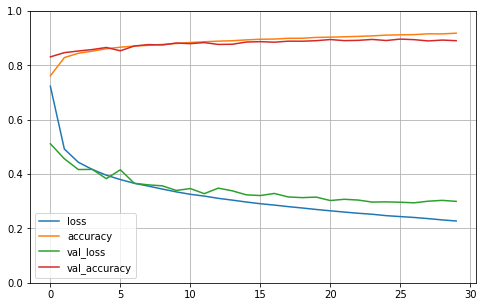

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [41]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 54.7335 - accuracy: 0.8554


[54.73348617553711, 0.855400025844574]

In [42]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [46]:
y_pred = np.argmax(model.predict(X_new), axis = 1)
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U10')

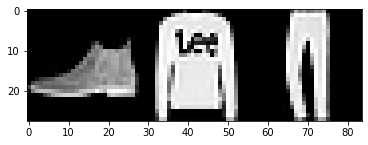

In [50]:
plt.imshow(np.concatenate(X_test[:3],axis = 1), cmap  = "gray")

In [52]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [53]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(X_train,y_train,epochs = 20, validation_data = (X_val, y_val))
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.7488 - val_loss: 0.7615
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8750 - val_loss: 0.5027
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4837 - val_loss: 0.4474
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4403 - val_loss: 0.4300
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4667 - val_loss: 0.4218
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4223 - val_loss: 0.4173
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4132 - val_loss: 0.3994
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3966 - val_loss: 0.3959
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3878 - val_loss: 0.3894
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4066 - val_loss: 0.4001

### Building Complex Models with Functional API

In [59]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs= [input_],outputs = [output])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_val, y_val))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.9707 - val_loss: 0.8738
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7869 - val_loss: 0.6790
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6587 - val_loss: 0.6299
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5949 - val_loss: 0.6022
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5961 - val_loss: 0.5799
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5905 - val_loss: 0.5629
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5511 - val_loss: 0.5480
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5273 - val_loss: 0.5374
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5077 - val_loss: 0.5263
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5201 - val_loss: 0.5170

In [64]:
input_A = keras.layers.Input(shape=[5], name ="wide_input")
input_B = keras.layers.Input(shape=[6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name="output")(concat)
model = keras.Model(inputs=[input_A,input_B], outputs = [output])
model.compile(loss = "mean_squared_error", optimizer = keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_val_A, X_val_B = X_val[:,:5], X_val[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
model.fit((X_train_A,X_train_B),y_train, epochs = 20, validation_data = ((X_val_A,X_val_B),y_val))
y_pred=model.predict((X_new_A,X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.6392 - val_loss: 1.1570
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0556 - val_loss: 0.8599
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7979 - val_loss: 0.7353
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7124 - val_loss: 0.6637
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6285 - val_loss: 0.6180
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6018 - val_loss: 0.5829
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5746 - val_loss: 0.5573
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5575 - val_loss: 0.5379
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5378 - val_loss: 0.5260
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5161 - val_loss: 0.5157

In [ ]:
input_A = keras.layers.Input(shape=[5], name ="wide_input")
input_B = keras.layers.Input(shape=[6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name="output")(concat)
aux_output = keras.layers.Dense(1,name="aux_output")(hidden2)
model = keras.Model(inputs = [input_A,input_b], outputs = [output,aux_output])
